In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
X, y = datasets.make_classification(n_samples = 2000, n_features = 2, n_informative = 2, n_repeated = 0, n_redundant = 0,
                                      n_classes = 3, n_clusters_per_class =1, class_sep = 0.9, random_state = 8)

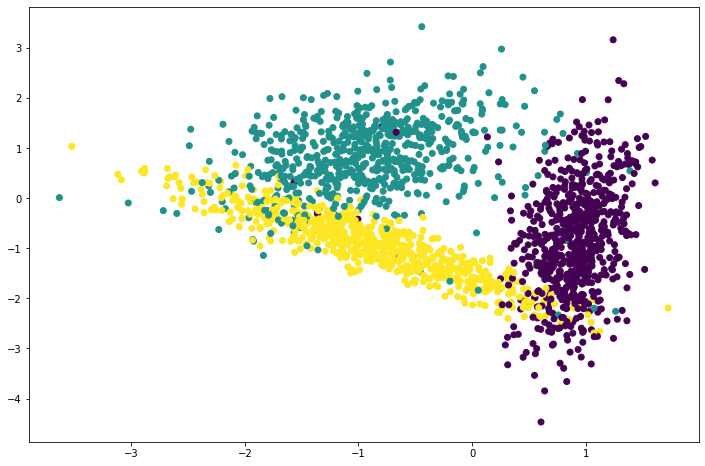

In [3]:
plt.figure(figsize = (12, 8))
plt.scatter(X[:, 0], X[:, 1], c = y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
def prepare_matrices(x, y):
    '''
    This function prepares x and y matrices with appropriate shapes.
    
    Arguements:
    x: Input Feature Matrix (numpy array of shape (m, n), m = number of examples, n = number of features)
    y: Output Vector / Target Vector (numpy array of shape (m, 1))
    
    Returns:
    x_new: Processed feature Matrix (numpy array of shape (n, m))
    y_new: Processed output Vector / Target Vector (numpy array of shape (c, m)), c = number of classes, m = number of examples
    y_new[:, i] is one hot vector in which index of value 1 corresponds to the class of that instance of data.
    '''
    m = x.shape[0]
    n = x.shape[1]
    new_x = x.T
    n_class = np.unique(y).shape[0]
    new_y = np.empty(shape = (n_class, m))
    
    for i in range(m):
        if y[i] == 0:
            new_y[:, i] = np.array([1, 0, 0])
        elif y[i] == 1:
            new_y[:, i] = np.array([0, 1, 0])
        else:
            new_y[:, i] = np.array([0, 0, 1])
            
    return new_x, new_y

In [6]:
def initialize_parameters(n, c, method = 'zeros'):
    '''
    This function initializes parameter matrix W and bias vector b.
    
    Arguements:
    n: Number of features
    c: Number of classes
    method: zeros / random. The method used to initialize paramter matrix.
    (default: 'zeros', i.e. initialization with zeros)
    
    Returns:
    W: Parameter matrix of shape (c, n), n = number of features, c = number of classes
    b: Bias vector of shape (c, 1)
    '''
    if method == 'zeros':
        W = np.zeros(shape = (c, n))
        b = np.zeros(shape = (c, 1))
    elif method == 'random':
        W = np.random.rand(c, n)
        b = np.random.rand(c, 1)
    assert(W.shape == (c, n))
    assert(b.shape == (c, 1))
    
    return W, b

In [7]:
def softmax(z):
    '''
    This function calculates softmax function of the input array.
    
    Arguements:
    z: Input array whose softmax function needs to be calculated, Note: The array shall be of the form (m, 1).
    
    Returns:
    z_softmax: Softmax function of the input array. The size of the output array will be same as that as input.
    '''
    expz = np.exp(z - np.max(z))
    
    return expz / np.sum(expz, axis = 0, keepdims = True)

In [8]:
def forward_prop(parameters, x):
    '''
    This function performs forward propagation on the network (the network for this implementation only includes softmax layer).
    
    Arguements:
    parameters: a tuple (W, b), where W is parameter matrix of shape (c, n) and b is bias matrix of shape (c, 1)
    x: Feature matrix of shape (n, m), m = number of training examples, n = number of features
    
    Returns:
    y_hat: Calculated hypothesis / output matrix of shape (c, m)
    '''
    W, b = parameters
    c = W.shape[0]
    m = x.shape[1]
    z = np.dot(W, x) + b
    y_hat = np.empty_like(z)
    for i in range(m):
        y_hat[:, i] = softmax(z[:, i])
        
    return y_hat

In [9]:
def backword_prop(y_hat, y, x):
    '''
    This function performs backword propagation on the network (the network for this implementation only includes softmax layer).
    
    Arguements:
    y_hat: Hypothesis matrix of shape (c, m), c = number of classes, m = number of training examples
    y: Output matrix of shape (c, m)
    x: Feature Matrix (numpy array of shape (n, m))
    
    Returns:
    dW: Derivative of parameters W (numpy array of shape (c, n))
    db: Derivative of bias b (numpy array of shape (c, 1))
    '''
    m = x.shape[1]
    n = x.shape[0]
    c = y.shape[0]
    dW = np.matmul((y_hat - y), x.T) / m
    db = np.sum((y_hat - y), axis = 1, keepdims = True) / m
    assert(dW.shape == (c, n))
    assert(db.shape == (c, 1))
    
    return dW, db

In [10]:
def cost_calc(y_hat, y):
    '''
    This function calculates cross entropy loss / cost of the classifier.
    
    Arguements:
    y_hat: Hypothesis matrix of shape (c, m), c = number of classes, m = number of training examples
    y: Output matrix of shape (c, m)
    
    Returns:
    cost: Cross entropy loss or cost
    '''
    m = y.shape[1]
    cost = -np.sum(np.multiply(y, np.log(y_hat + 0.0000000001))) / m
    
    return cost

In [11]:
def convergence_check(costs, epsilon):
    '''
    This function checks convergence of gradient descent algorithm.
    
    Arguements:
    costs: A list containing cost values of current and previous iterations
    epsilon: Threshold of square error difference between costs of consecutive iterations used to
    decide convergence of gradient descent algorithm
    
    Returns:
    Boolean (True / False) value of whether algorithm has been converged
    '''
    error = (costs[0] - costs[1]) ** 2
    return error < epsilon

In [12]:
def softmax_regression(X, y, num_iterations = 50000, algo_type = 'batch', 
                                   learning_rate = 0.1, epsilon = 1e-05, verbose = True, initialization = 'zeros'):
    '''
    This function performs softmax regression using gradient descent algorithm for minimising cost.
    
    Arguements:
    X: Feature Matrix (numpy array of shape (m, n), m = number of examples, n = number of features)
    y: Output Vector / Target Vector (numpy array of shape (m, 1))
    num_iterations (optional): Max number of iterations (default value: 50000) (if convergence is acheived before this number,
                               algorithm will be stopped)
    algo_type: 'batch' / 'stochastic' for batch / stochastic gradient descent algorithms.
                Type of algorithm to be used for finding parameters
    learning_rate (optional): Value for learning rate (default value: 0.1)
    epsilon (optional): Threshold of square error difference between costs of consecutive iterations used to
                        decide convergence of gradient descent algorithm (default value = 1e-05)
    verbose (optional): Boolean value which decide whether the output of the algorithm will be verbose
    initialization (optional): 'zeros' / 'random', parameter used for method of initialization of parameter matrix
    
    Returns:
    parameters: A tuple (W, b), where W is parameter matrix of shape (c, n) and b is bias matrix of shape (c, 1)
    costs: A dictionary with learning rate as key and list of costs for every 100th iteration as value
    '''
    X_processed, y_processed = prepare_matrices(X, y)
    n = X_processed.shape[0]
    c = y_processed.shape[0]
    W, b = initialize_parameters(n, c, method = initialization)
    y_hat = forward_prop((W, b), X_processed)
    cost = cost_calc(y_hat, y_processed)
    if verbose:
        print('Initial Cost:{}'.format(cost))
    costs = {}
    costs_list = []
    costs_list.append(cost)
    if algo_type == 'batch':
        for i in range(num_iterations):
            y_hat = forward_prop((W, b), X_processed)
            dW, db = backword_prop(y_hat, y_processed, X_processed)
            cost = cost_calc(y_hat, y_processed)
            W = W - (learning_rate * dW)
            b = b - (learning_rate * db)
            if verbose:
                if ((i + 1) % 100) == 0:
                    print('Iteration:{}, Cost:{}'.format((i+1), cost))
            if ((i + 1) % 100) == 0:
                costs_list.append(cost)
            if len(costs_list) >= 2:
                if convergence_check(costs_list[-2:], epsilon):
                    print('Alogorithm has converged!!')
                    break
        costs[learning_rate] = costs_list
    elif algo_type == 'stochastic':
        y_hat = forward_prop((W, b), X_processed)
        for i in range(num_iterations):
            index = i % (len(y) - 1)
            W = W - learning_rate * np.matmul((y_hat[:, index].reshape((c, 1)) - y_processed[:, index].reshape((c, 1)))
                                              , X_processed[:, index].reshape((1, n)))
            b = b - learning_rate * (y_hat[:, index].reshape((c, 1)) - y_processed[:, index].reshape(c, 1))
            y_hat = forward_prop((W, b), X_processed)
            cost = cost_calc(y_hat, y_processed)
            if verbose:
                if ((i + 1) % 100) == 0:
                    print('Iteration:{}, Cost:{}'.format((i+1), cost))
            if ((i + 1) % 100) == 0:
                costs_list.append(cost)
            if len(costs_list) >= 2:
                if convergence_check(costs_list[-2:], epsilon):
                    print('Alogorithm has converged')
                    break
        costs[learning_rate] = costs_list
    return W, b, costs

In [13]:
def accuracy_calc(W, b, X, y):
    '''
    This function calculates accuracy of classification and predicted output (y) using parameters and feature matrix.
    
    Arguements:
    W: Parameter matrix of shape (c, n), n = number of features, c = number of classes
    b: Bias matrix of shape (c, 1)
    X: Feature Matrix (numpy array of shape (m, n), m = number of examples, n = number of features)
    y: Output Vector / Target Vector (numpy array of shape (m, 1))
    
    Returns:
    accuracy: Accuracy of classification in percentage    
    y_pred: Output / label matrix of shape (m, 1), the values of y will be the predicted class
    '''
    x, _ = prepare_matrices(X, y)
    m = x.shape[1]
    y_hat = forward_prop((W, b), x)
    y_pred = np.argmax(y_hat, axis = 0) 
    accuracy = np.round(np.count_nonzero(y == y_pred) / m, 2) * 100
    
    return y, accuracy

In [14]:
# Training of the model:
W, b, costs = softmax_regression(X_train, y_train, algo_type = 'batch', initialization = 'random')

Initial Cost:1.2695320707090865
Iteration:100, Cost:0.3937050065321047
Iteration:200, Cost:0.33259807579370876
Iteration:300, Cost:0.3115962851939882
Iteration:400, Cost:0.3011784666700583
Iteration:500, Cost:0.2950340897534786
Iteration:600, Cost:0.2910278380395272
Iteration:700, Cost:0.2882424800241367
Alogorithm has converged!!


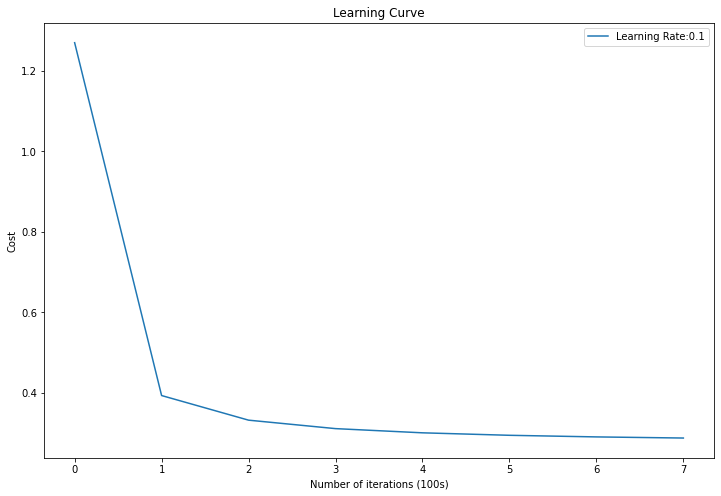

In [15]:
# Plot learning curve
plt.figure(figsize = (12, 8))
learning_rate = list(costs.keys())[0]
plt.plot(list(costs.values())[0], label = 'Learning Rate:{}'.format(learning_rate))
plt.xlabel('Number of iterations (100s)')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.legend()

In [16]:
# Calculate train accuracy:
_, train_accuracy = accuracy_calc(W, b, X_train, y_train)
print('Training Set Accuracy is:{}'.format(train_accuracy))

Training Set Accuracy is:91.0


In [17]:
# Calculate test accuracy:
_, test_accuracy = accuracy_calc(W, b, X_test, y_test)
print('Test Set Accuracy is:{}'.format(test_accuracy))

Test Set Accuracy is:89.0
